# **TRABALHO DE DATA SCIENTE**

#### PROJETO ESPECIAL
#### PROFESSOR: ABRANTES ARAUJO SILVA FILHO
#### GRUPO 1: 

*   MARISA 
*   DAVI
*   DANILO

#### BASE DE DADOS: PORTO SEGURO
#### ORIGEM: KAGGLE


#INCLUSÃO DAS BIBLIOTECAS QUE SERÃO NECESSÁRIAS NO DECORRER DO CÓDIGO


1.   Pandas: inclusão dos dados em um dataframe
2.   Numpy: biblioteca númerica para *comparações*
3.   Matplotlib: inclusão da biblioteca *pyplot* para geração de gráficos
4.   Seaborn: biblioteca de geração de visualização de dados
5.   Sklearn: biblioteca para geração de treino e teste, metricas e matrix confusão


In [1]:
#!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

#import sweetviz as xx


#CARGA DOS ARQUIVOS DE TREINO

- Devido ao tamanho original do arquivo foi necessário particioná-lo em 2 para que o Github aceitasse os arquivos e pudessemos fazer uma leitura direta dele no local de armazenamento, independente do programa gerar de código usado.

In [3]:
# Parte 1 do arquivo
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/01%20-%20TRAIN/train_01.csv'
  
df_train = pd.read_csv(url, error_bad_lines=False, delimiter=';')
print('Quantidade registro da primeira parte: ', df_train['id'].count())

# Parte 2 do arquivo 
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/01%20-%20TRAIN/train_02.csv'  
  
df2_train = pd.read_csv(url, error_bad_lines=False, delimiter=';')
print('Quantidade registro da segunda parte: ', df2_train['id'].count())

# Junção das partes  
df_train = df_train.append(df2_train)
print('Quantidade total registros: ', df_train['id'].count())


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Quantidade registro da primeira parte:  297605
Quantidade registro da segunda parte:  297607
Quantidade total registros:  595212


In [4]:
# Analise inicial dos dados carregados, verificando se todos os campos possuem 
# a mesma quantidade de registro. 
# Já sabe-se que os campos nulos foram tratados com o valor "-1"

df_train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 297606
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [9]:
# Demonstração dos 5 primeiras linhas de registros de forma Transversal

df_train.head(5).T

,0,1,2,3,4
id,7.000000,9.000000,13.000000,16.000000,17.000000
target,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000,0.000000,0.000000
ps_ind_02_cat,2.000000,1.000000,4.000000,1.000000,2.000000
ps_ind_03,5.000000,7.000000,9.000000,2.000000,0.000000
ps_ind_04_cat,1.000000,0.000000,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,1.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000,0.000000,0.000000


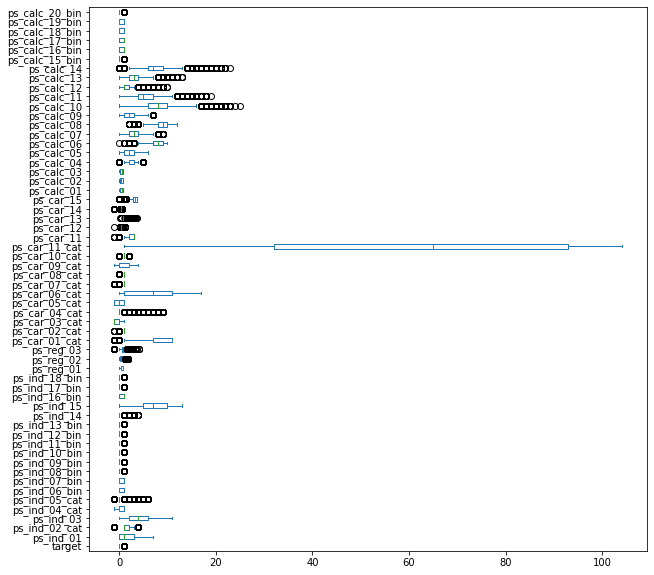

In [10]:
# Tentativa de geração da plotagem das colunas existentes, porém como a quantidade é elevado, o gráfico acaba ficando
# de forma desconfigurada e com o entendimento totalmente ilegivel. 
# Ainda é possível ver uma coluna que destoa das demais, sem conseguir identificar.

# Retirado a coluna "id" que faz a identificação dos registros.
df_train.drop('id', axis=1).plot.box(vert=False)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Analise da Coluna Target

In [11]:
# Idenficação do valor Mínimo e Máximo

print('Valor mínimo do coluna Target: ', df_train['target'].min())
print('Valor maximo do coluna Target: ', df_train['target'].max())

Valor mínimo do coluna Target:  0
Valor maximo do coluna Target:  1


In [12]:
# Quantidade de registros para cada valor da coluna 'Target'

qtd_target = df_train['target'].value_counts()


print('Quantidade de registros ' , df_train['target'].min() , ':' ,qtd_target[0], 'corresponde a:', qtd_target[0]/qtd_target.sum() * 100)
print('Quantidade de registros ' , df_train['target'].max() , ':' ,qtd_target[1], 'corresponde a:', qtd_target[1]/qtd_target.sum() * 100)

Quantidade de registros  0 : 573518 corresponde a: 96.3552482140817
Quantidade de registros  1 : 21694 corresponde a: 3.6447517859182947


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


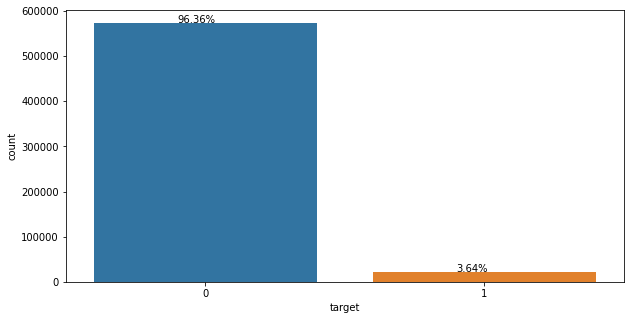

In [13]:
# Gráfico da coluna "Target", utilizando a biblioteca "matplotlib" 
# O intuido é demonstrar a diferença na quantidade de registros entre os valores da coluna

plt.figure(figsize=(10,5))
ax = sns.countplot('target',data=df_train)
for p in ax.patches:
  ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_train['target'])), (p.get_x()+ 0.3, p.get_height()+1000))

## ANALISE DO RESULTADO:
***
**Verificamos que o valor '0' demonstra as pessoas que não solicitou seguro e 1 as pessoas que solicitaram. 
Quantidade de registros que não solicitam sinistro é muito alto, o que demonstra que os dados fornecidos pelo Porto Seguro são Desbalanceados. Isso pode compromete a assertividade do modelo, porém também temos conhecimento de que a quantidade de pessoas que não geram sinistro é alta, o que justifica a coluna TARGET.**

***

# Separação das colunas em 8 grupos

Inteção é facilitar a análise em grupos separadas, mas que parecem ser da mesma característica.

* "n" indica a numeração da coluna.

1.   **df_ps_ind**: colunas "ps_ind_n".
2.   **df_ps_ind_cat**: colunas "ps_ind_n_cat".
3.   **df_ps_ind_bin**: colunas "ps_ind_n_bin".
4.   **df_ps_reg**: colunas "ps_ps_reg_n".
5.   **df_ps_car**: colunas "ps_car_n".
6.   **df_ps_car_cat**: colunas "ps_car_n_cat".
7.   **df_ps_cal**: colunas "ps_cal_n".
8.   **df_ps_cal_bin**: colunas "ps_car_bin".






In [14]:
# LISTA DAS COLUNAS CONFORME GRUPOS

lista_ps_ind = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']

lista_ps_ind_cat = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat']

lista_ps_ind_bin = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin','ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
                    'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']

lista_ps_reg = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03']         

lista_ps_car = ['ps_car_11','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] 

lista_ps_car_cat = ['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat','ps_car_05_cat', 'ps_car_06_cat', 
                    'ps_car_07_cat', 'ps_car_08_cat','ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']  

lista_ps_cal = [ 'ps_calc_01','ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06','ps_calc_07', 
                'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11','ps_calc_12', 'ps_calc_13', 'ps_calc_14']

lista_ps_cal_bin = [ 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']



##**GRUPO 1**


In [15]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind = df_train

lista =  lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind = df_ps_ind.drop(lista, axis=1)

# Retira a coluna "id" para geração estatistica

df_ps_ind.drop('id', axis=1).describe()

,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,4.423318,0.012451,7.299922
std,0.187401,1.983789,2.699902,0.127545,3.546042
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,5.000000
50%,0.000000,1.000000,4.000000,0.000000,7.000000
75%,0.000000,3.000000,6.000000,0.000000,10.000000
max,1.000000,7.000000,11.000000,4.000000,13.000000


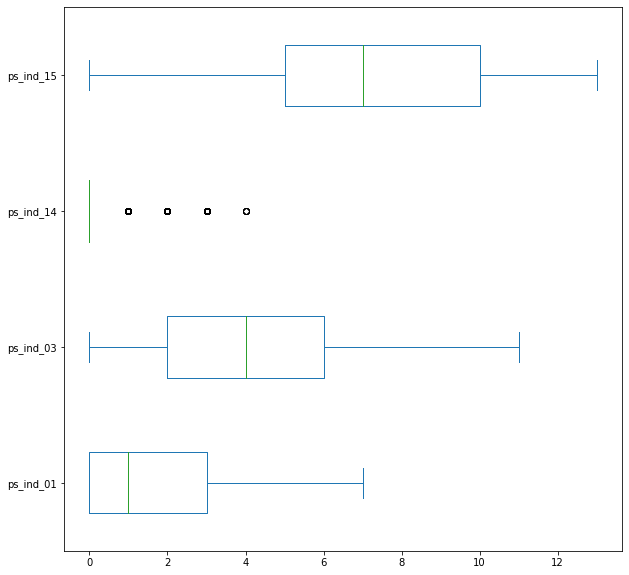

In [16]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind.drop(lista_id_target, axis=1).plot.box(vert=False)

Quantidade de registros por dimensão na coluna PS_IND_14
0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


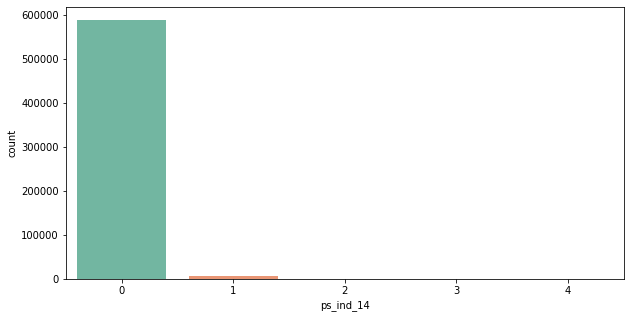

In [17]:
# Analisando o gráfico anterior, vamos identificar os outliers pertencentes a coluna "ps_ind_14"
# Neste caso, é a única coluna com outlier.

qtd_outliers = df_ps_ind['ps_ind_14'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_14')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind['ps_ind_14'], palette="Set2")

***
Assim como a coluna **TARGET** , é possível identificar pelo gráfico que existem muitos registros com valor '0'

***


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

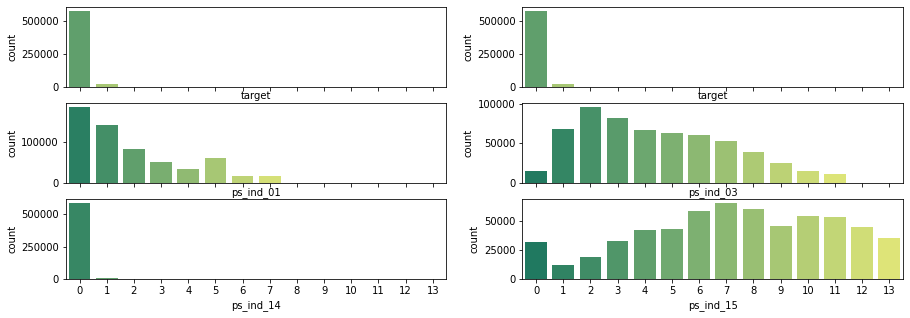

In [18]:
# Grupo 1: Index(['id', 'target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15'], dtype='object')
# Gráfico de cada coluna por quantidade de registros por tipo de dado.

fig,ax = plt.subplots(3,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4, ax5, ax6 = ax.flatten()
sns.countplot(df_ps_ind['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_ind['target'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind['ps_ind_01'],palette='summer',ax=ax3)
sns.countplot(df_ps_ind['ps_ind_03'],palette='summer',ax=ax4)
sns.countplot(df_ps_ind['ps_ind_14'],palette='summer',ax=ax5)
sns.countplot(df_ps_ind['ps_ind_15'],palette='summer',ax=ax6)


## ANALISE DO RESULTADO - GRUPO 1:
***
Graficos demonstram que existem diversos valores para tipos de colunas diferentes.
 Atenção para coluna "ps_ind_14", onde analise separada demonstrou que coluna possui 4 tipos de valores, porém a maioria dos registros são de valor zerado. O que se identifica com a maioria dos valores do TARGET.

***


##**GRUPO 2**

In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind_cat = df_train

lista =  lista_ps_ind + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind_cat = df_ps_ind_cat.drop(lista, axis=1)


# Retira a coluna "id" para geração estatistica

df_ps_ind_cat.drop('id', axis=1).describe()

,target,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat
count,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.358943,0.416794,0.405188
std,0.187401,0.664594,0.493311,1.350642
min,0.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,2.000000,1.000000,0.000000
max,1.000000,4.000000,1.000000,6.000000


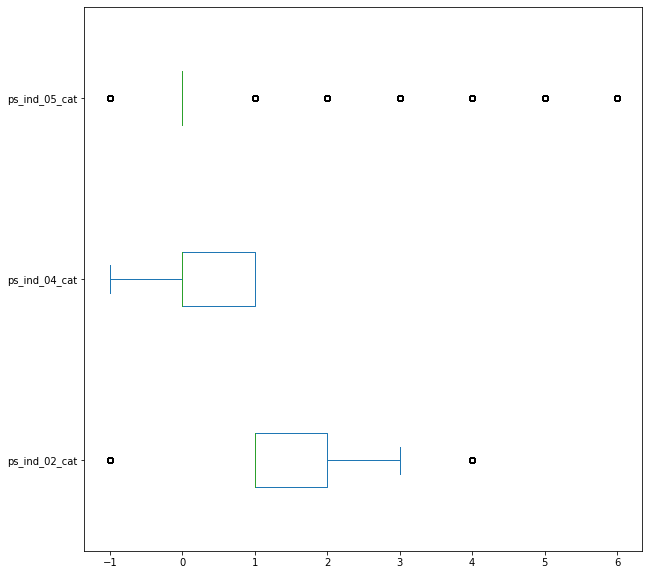

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind_cat.drop(lista_id_target, axis=1).plot.box(vert=False)

In [ ]:
# Analisando o gráfico anterior, vamos identificar os outliers pertencentes a coluna "ps_ind_05_cat" e "ps_ind_02_cat"

qtd_outliers= df_ps_ind_cat['ps_ind_05_cat'].value_counts()
qtd_outliers_02= df_ps_ind_cat['ps_ind_02_cat'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_05_CAT')
print(qtd_outliers)

print("*****************************************************************************")

print('Quantidade de registros por dimensão na coluna PS_IND_02_CAT')
print(qtd_outliers_02)

print("*****************************************************************************")


Quantidade de registros por dimensão na coluna PS_IND_05_CAT
 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
*****************************************************************************
Quantidade de registros por dimensão na coluna PS_IND_02_CAT
 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64
*****************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

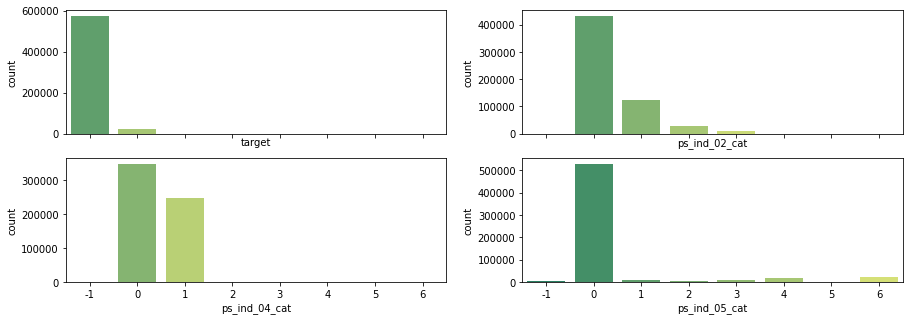

In [ ]:
# Grupo 2: Index(['id', 'target', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat'])
# Gráfico de cada coluna por quantidade de registros por tipo de dado.

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_ps_ind_cat['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_ind_cat['ps_ind_02_cat'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind_cat['ps_ind_04_cat'],palette='summer',ax=ax3)
sns.countplot(df_ps_ind_cat['ps_ind_05_cat'],palette='summer',ax=ax4)

## ANALISE DO RESULTADO - GRUPO 2:
***
Verificado que existem colunas com valores negativos.
Na descrição do problema foi informado que valores negativos são nulos e que tiram seu preenchimento feito pela Porto Seguro.
***

##**GRUPO 3**

In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind_bin = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind_bin = df_ps_ind_bin.drop(lista, axis=1)

# Retira a coluna "id" para geração estatistica

df_ps_ind_bin.drop('id', axis=1).describe().T

## Todos os valores estam entre 0 e 1.
## O que identifica que esse conjunto é binario

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.0,0.0,0.0,0.0,1.0
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Geração dos valores da matriz comparando o Target com a coluna


print('Confusion matrix - TARGET x PS_IND_06_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_06_bin'])
print(matrix)

print('\n*********************************************************************\n')

print('Confusion matrix - TARGET x PS_IND_07_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_07_bin'])
print(matrix)

print('\n*********************************************************************\n')

print('Confusion matrix - TARGET x PS_IND_10_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_10_bin'])
print(matrix)

Confusion matrix - TARGET x PS_IND_06_BIN 
[[345846 227672]
 [ 15006   6688]]

*********************************************************************

Confusion matrix - TARGET x PS_IND_07_BIN 
[[427773 145745]
 [ 14450   7244]]

*********************************************************************

Confusion matrix - TARGET x PS_IND_10_BIN 
[[573308    210]
 [ 21682     12]]


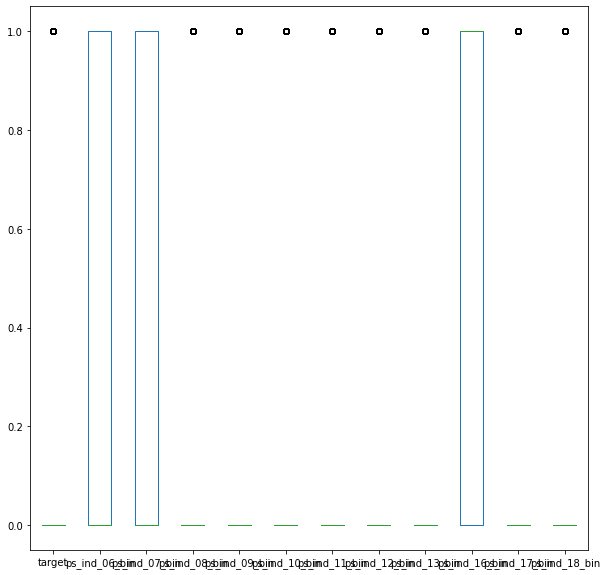

<Figure size 720x432 with 0 Axes>

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind_bin.drop('id', axis=1).plot.box()
plt.figure(figsize=(10,6))
plt.show()

Quantidade de registros por dimensão na coluna PS_IND_07_BIN
0    442223
1    152989
Name: ps_ind_07_bin, dtype: int64
*****************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


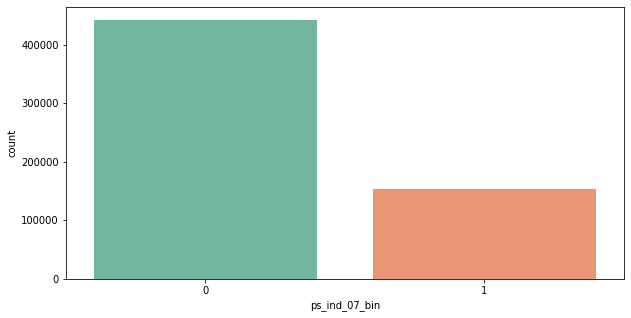

In [ ]:
# Analisando o gráfico anterior, vamos identificar os outliers pertencentes a coluna "ps_ind_07_bin"

qtd_outliers= df_ps_ind_bin['ps_ind_07_bin'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_07_BIN')
print(qtd_outliers)

print("*****************************************************************************")


plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind_bin['ps_ind_07_bin'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

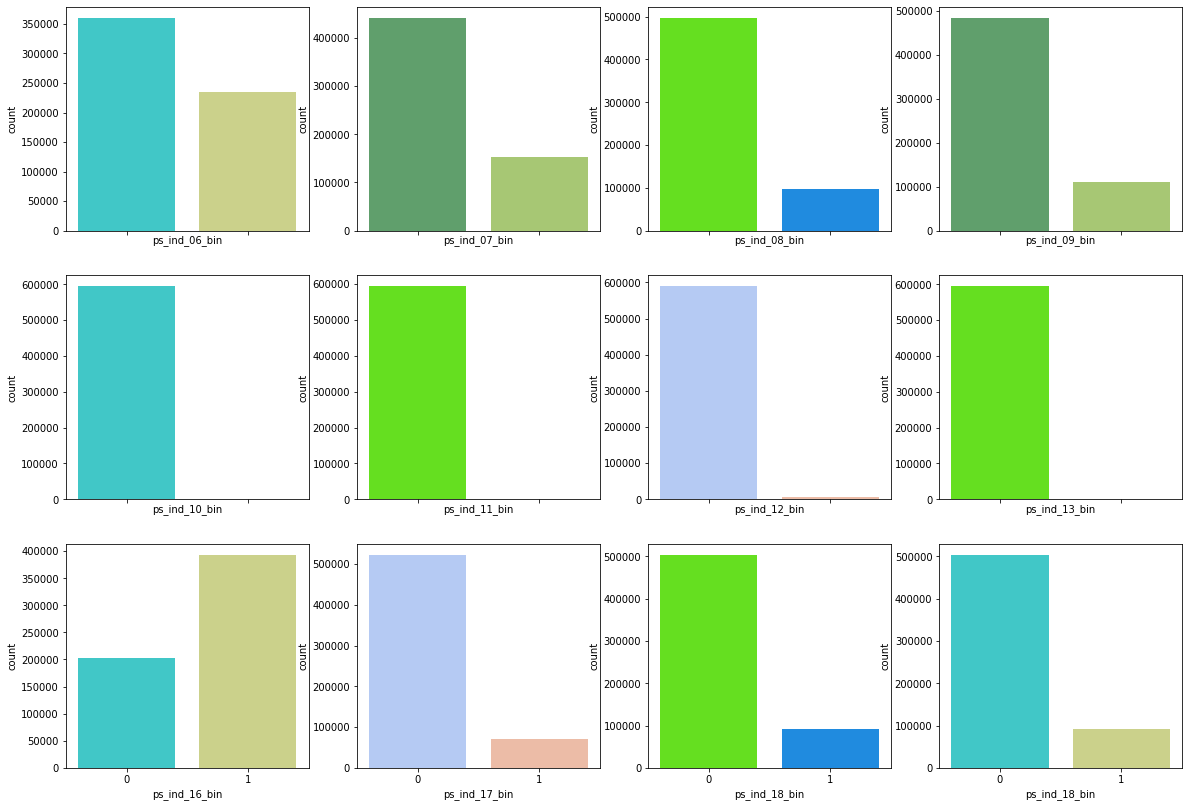

In [ ]:
# Grupo 3: Index(['id', 'target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
#                                 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin')

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_ind_bin['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_ind_bin['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind_bin['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_ind_bin['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(df_ps_ind_bin['ps_ind_10_bin'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_ind_bin['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_ind_bin['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_ind_bin['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_ind_bin['ps_ind_16_bin'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_ind_bin['ps_ind_17_bin'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_ind_bin['ps_ind_18_bin'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_ind_bin['ps_ind_18_bin'],palette='rainbow',ax=ax12)

##ANALISE DO RESULTADO - GRUPO 3:
***
A maior parte dos gráficos são parecidas com o target, 0 e 1. Os 3 últimos estão discrepantes. Seria o caso de termos acurácia alta com os dados próximos?
A variável x está com xx% de valores nulos, por esse motivo será realizado isso.
****



##**GRUPO 4**

In [ ]:
df_ps_reg = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_reg = df_ps_reg.drop(lista, axis=1)

df_ps_reg.describe()

,id,target,ps_reg_01,ps_reg_02,ps_reg_03
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.610991,0.439184,0.551102
std,4.293678e+05,0.187401,0.287643,0.404264,0.793506
min,7.000000e+00,0.000000,0.000000,0.000000,-1.000000
25%,3.719915e+05,0.000000,0.400000,0.200000,0.525000
50%,7.435475e+05,0.000000,0.700000,0.300000,0.720677
75%,1.115549e+06,0.000000,0.900000,0.600000,1.000000
max,1.488027e+06,1.000000,0.900000,1.800000,4.037945


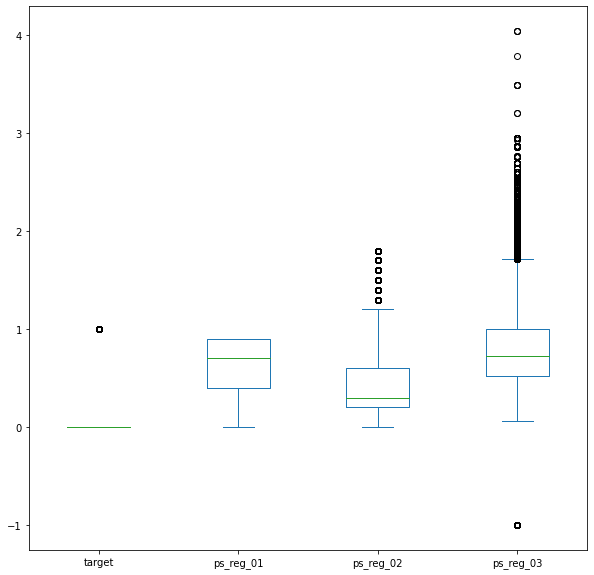

<Figure size 432x432 with 0 Axes>

In [ ]:
df_ps_reg.drop('id', axis=1).plot.box()
plt.figure(figsize=(6,6))
plt.show()

Quantidade de registros por dimensão na coluna PS_REG_03
-1.000000    107772
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 1.397990         1
 0.215058         1
 1.620764         1
 1.967073         1
 1.743560         1
Name: ps_reg_03, Length: 5013, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


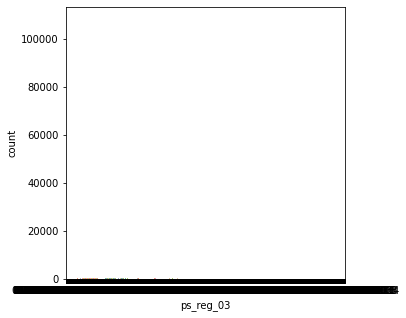

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_reg_03"

qtd_outliers = df_ps_reg['ps_reg_03'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_REG_03')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(5,5))
sns.countplot(df_ps_reg['ps_reg_03'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

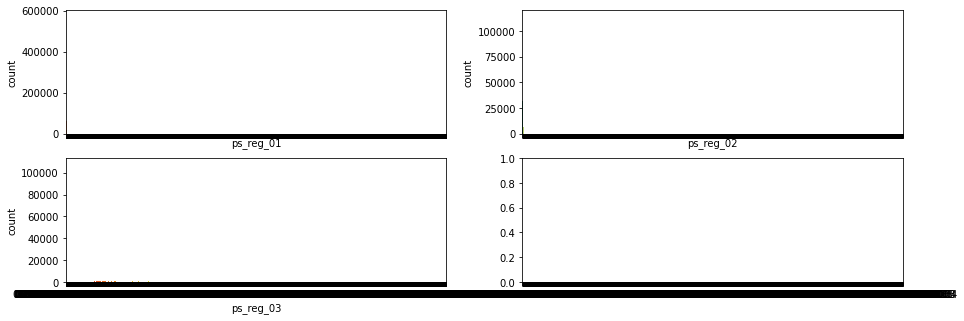

In [ ]:
# Grupo 4: Index(['id', 'target', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03')

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_ps_reg['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_reg['ps_reg_01'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_reg['ps_reg_02'],palette='summer',ax=ax2)
sns.countplot(df_ps_reg['ps_reg_03'],palette='gist_rainbow',ax=ax3)

In [ ]:
#GRUPO 4


##ANALISE DO RESULTADO - GRUPO 4:
***
Quantidade muito grande de valores Nulos (-1). Os valores estão como 0., o que gera dificuldade na análise dos dados.
Coluna reg 03 não será considerada pelo fato de ter muitos outliers e valores nulos.
***

##**GRUPO 5**

In [ ]:
df_ps_car = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_car = df_ps_car.drop(lista, axis=1)

df_ps_car.describe()

,id,target,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,2.346072,0.379945,0.813265,0.276256,3.065899
std,4.293678e+05,0.187401,0.832548,0.058327,0.224588,0.357154,0.731366
min,7.000000e+00,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000
25%,3.719915e+05,0.000000,2.000000,0.316228,0.670867,0.333167,2.828427
50%,7.435475e+05,0.000000,3.000000,0.374166,0.765811,0.368782,3.316625
75%,1.115549e+06,0.000000,3.000000,0.400000,0.906190,0.396485,3.605551
max,1.488027e+06,1.000000,3.000000,1.264911,3.720626,0.636396,3.741657


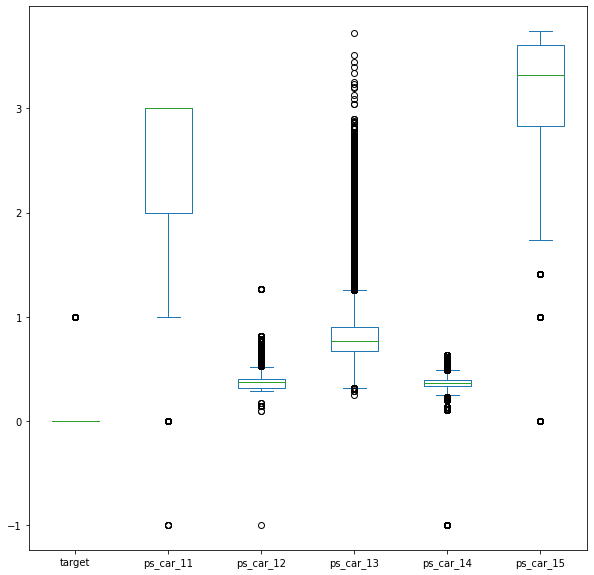

In [ ]:
df_ps_car.drop('id', axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_CAR_11
 3    318919
 2    189353
 1     60952
 0     25983
-1         5
Name: ps_car_11, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


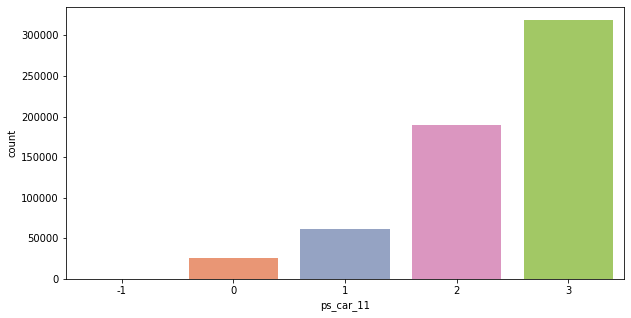

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_11"

qtd_outliers = df_ps_car['ps_car_11'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CAR_11')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_car['ps_car_11'], palette="Set2")

Quantidade de registros por dimensão na coluna PS_CAR_15
3.605551    109765
3.464102     77200
3.316625     68737
3.162278     63323
3.741657     57757
2.828427     48680
3.000000     48537
2.645751     30388
2.449490     20445
2.236068     19397
0.000000     14186
2.000000     12830
1.732051     10744
1.000000      6708
1.414214      6515
Name: ps_car_15, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


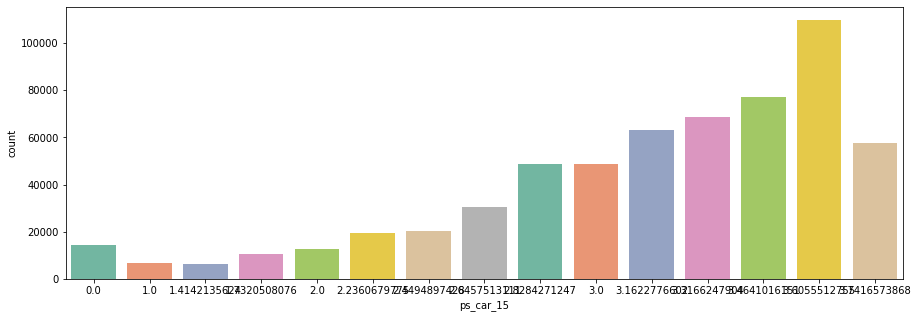

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_15"

qtd_outliers = df_ps_car['ps_car_15'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CAR_15')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(15,5))
sns.countplot(df_ps_car['ps_car_15'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

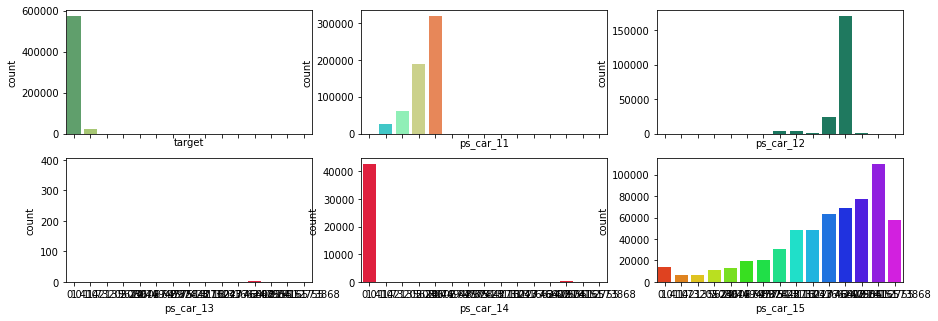

In [ ]:
# Grupo 5: Index(['id', 'target', 'ps_car_11','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15')

fig,ax = plt.subplots(2,3,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(df_ps_car['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_car['ps_car_11'],palette='rainbow',ax=ax2)
sns.countplot(df_ps_car['ps_car_12'],palette='summer',ax=ax3)
sns.countplot(df_ps_car['ps_car_13'],palette='gist_rainbow',ax=ax4)
sns.countplot(df_ps_car['ps_car_14'],palette='gist_rainbow',ax=ax5)
sns.countplot(df_ps_car['ps_car_15'],palette='gist_rainbow',ax=ax6)

##ANALISE DO RESULTADO - GRUPO 5:
***
Neste grupo, os recursos parecem ser continuos, com excessão do ps_car_11, que possui muitas categorias e a variável 15, que
 traz uma discrepância de valores, portanto serão desconsiderados da análise inicial.
 ***

##**GRUPO 6**

In [ ]:
df_ps_car_cat = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_cal + lista_ps_cal_bin
df_ps_car_cat = df_ps_car_cat.drop(lista, axis=1)

df_ps_car_cat.describe()

,id,target,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674
std,4.293678e+05,0.187401,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455
min,7.000000e+00,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000
25%,3.719915e+05,0.000000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,7.435475e+05,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,1.115549e+06,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,1.488027e+06,1.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


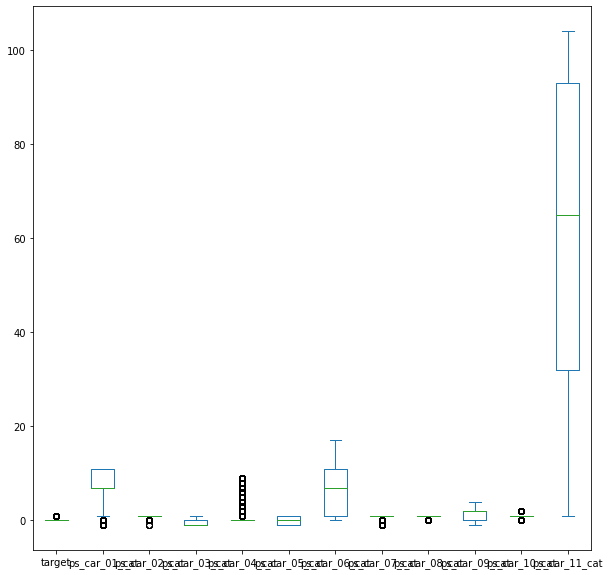

In [ ]:
df_ps_car_cat.drop('id', axis=1).plot.box()

Possível ver que a coluna com valores totalmente fora do padrão das demais é a "ps_car_11_cat", que possui valores listados de "0" à "100"

Quantidade de registros por dimensão na coluna PS_CAR_11_CAT
104    85083
103    24262
64     22278
87     17106
32     12578
       ...  
58      1464
81      1433
56      1272
18      1233
63      1103
Name: ps_car_11_cat, Length: 104, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


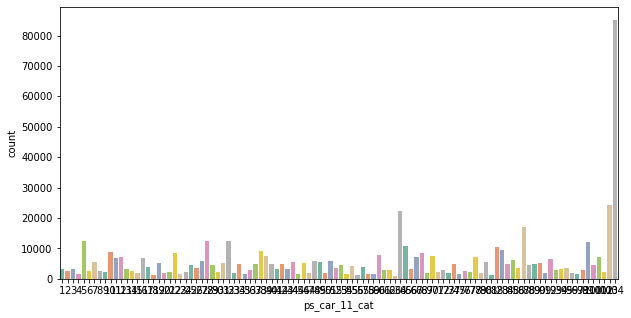

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_11"

qtd_outliers = df_ps_car_cat['ps_car_11_cat'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CAR_11_CAT')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_car_cat['ps_car_11_cat'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

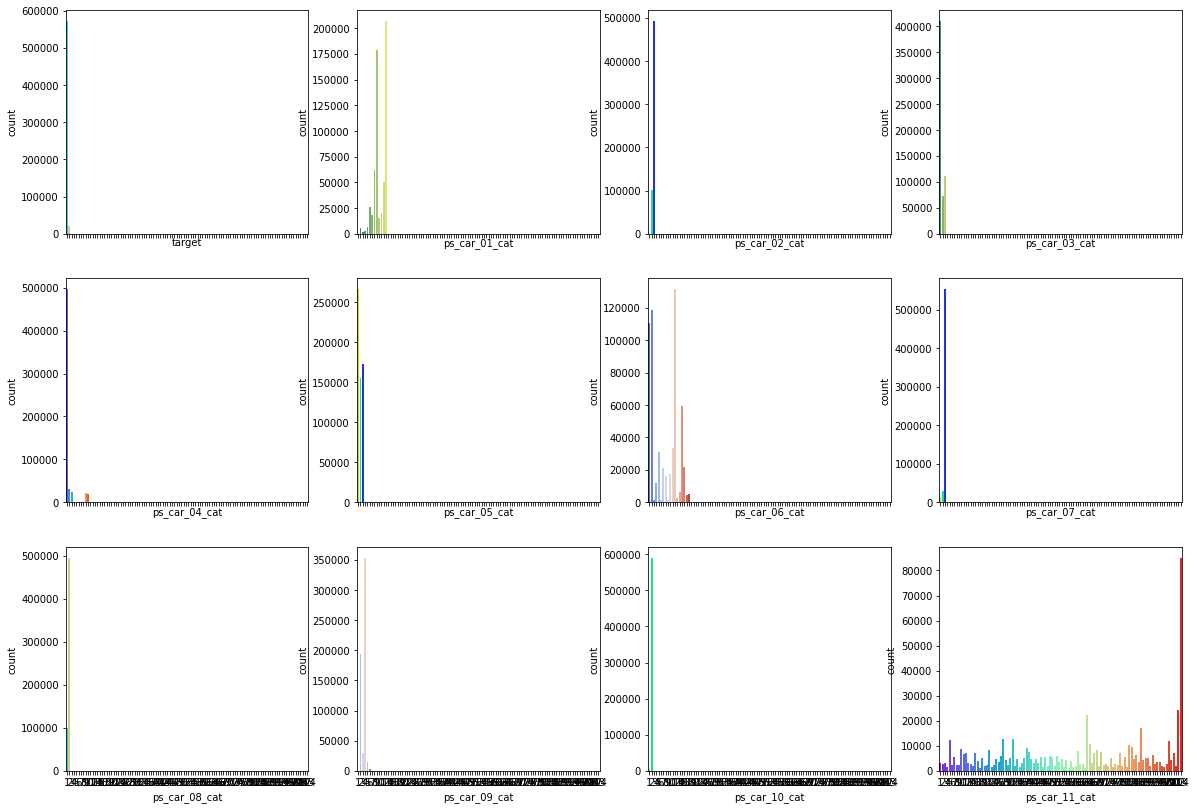

In [ ]:
# Grupo 6: Index('id', 'target','ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat','ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat','ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat')

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_car_cat['target'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_car_cat['ps_car_01_cat'],palette='summer',ax=ax2)
sns.countplot(df_ps_car_cat['ps_car_02_cat'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_car_cat['ps_car_03_cat'],palette='summer',ax=ax4)
sns.countplot(df_ps_car_cat['ps_car_04_cat'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_car_cat['ps_car_05_cat'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_car_cat['ps_car_06_cat'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_car_cat['ps_car_07_cat'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_car_cat['ps_car_08_cat'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_car_cat['ps_car_09_cat'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_car_cat['ps_car_10_cat'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_car_cat['ps_car_11_cat'],palette='rainbow',ax=ax12)

##ANALISE DO RESULTADO - GRUPO 6:
***
Percebe-se que o "ps_car_11_cat" possui valores discrepantes e que seria melhor retira-lo ou fazer analise separado (fazer outra box plot sem o "ps_car_11_cat"). Verifica-se a maior presença de outliers nas outras variaveis. Atraves dos graficos nota-se uma distribuição de observações mais a esquerda. Verifica-se que o "ps_car_03_cat" possui em media 70% dos dados são ausentes (-1), o que possivelmente justifica sua retirada. O "ps_car_05_cat" tambem possui um numero expressivo de dados ausentes.
***

##**GRUPO 7**

In [ ]:
df_ps_cal = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal_bin
df_ps_cal = df_ps_cal.drop(lista, axis=1)

df_ps_cal.describe()

,id,target,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,4.293678e+05,0.187401,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,7.435475e+05,0.000000,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,1.115549e+06,0.000000,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,1.488027e+06,1.000000,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


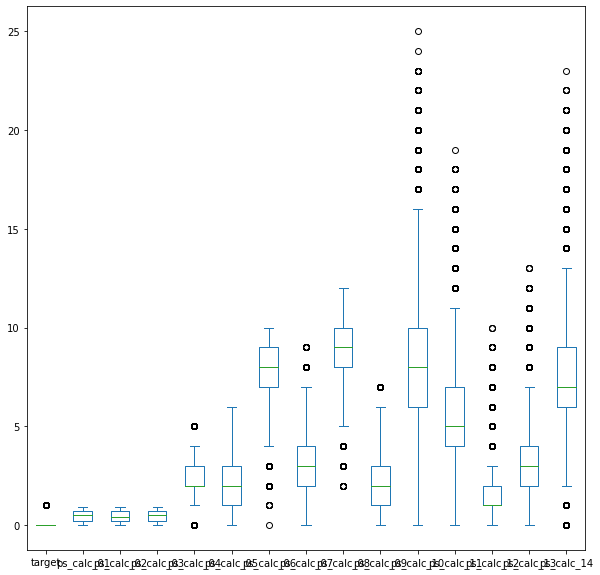

In [ ]:
df_ps_cal.drop('id', axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_CALC_05
2    195160
1    170860
3    119192
0     61226
4     40682
5      7534
6       558
Name: ps_calc_05, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


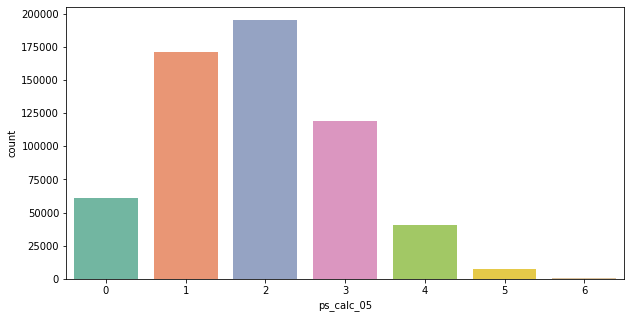

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_11"

qtd_outliers = df_ps_cal['ps_calc_05'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CALC_05')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_cal['ps_calc_05'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

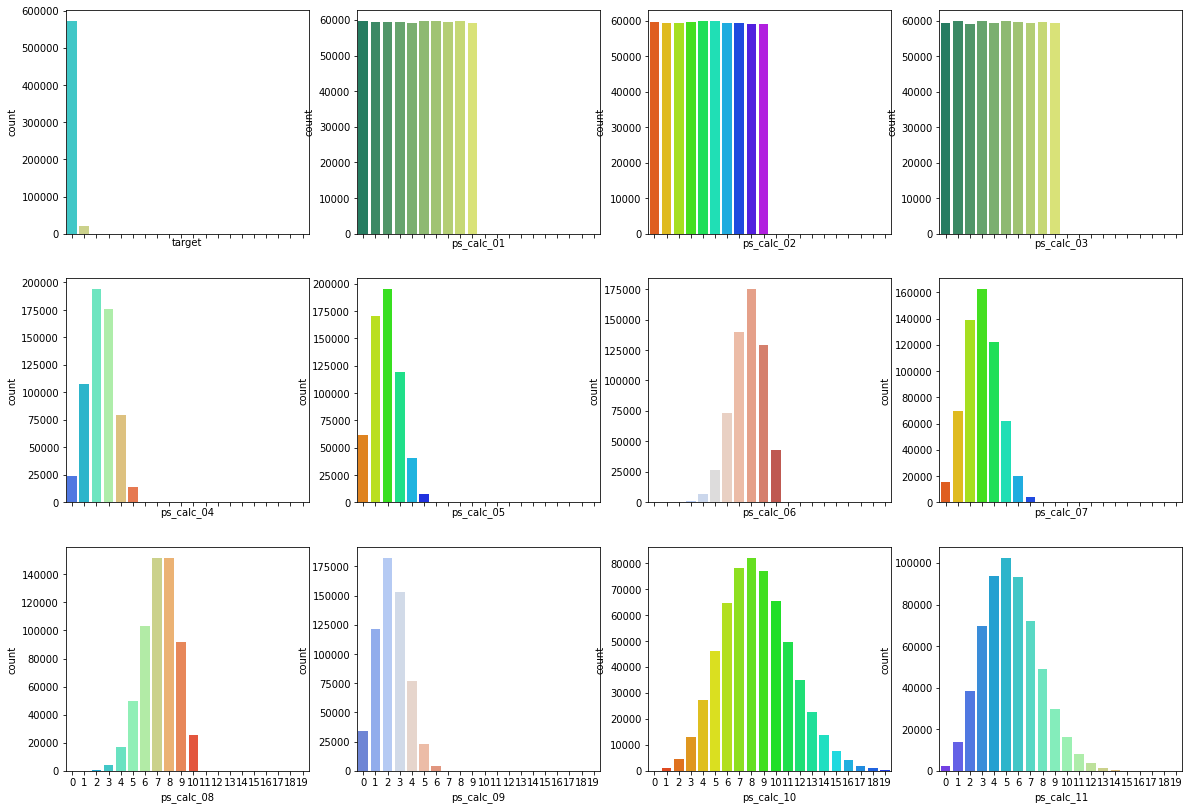

In [ ]:
# Grupo 7: Index('id', 'ps_calc_01','ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06','ps_calc_07','ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11','ps_calc_12', 'ps_calc_13', 'ps_calc_14')

 

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_cal['target'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_cal['ps_calc_01'],palette='summer',ax=ax2)
sns.countplot(df_ps_cal['ps_calc_02'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_cal['ps_calc_03'],palette='summer',ax=ax4)
sns.countplot(df_ps_cal['ps_calc_04'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_cal['ps_calc_05'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_cal['ps_calc_06'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_cal['ps_calc_07'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_cal['ps_calc_08'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_cal['ps_calc_09'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_cal['ps_calc_10'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_cal['ps_calc_11'],palette='rainbow',ax=ax12)

##ANALISE DO RESULTADO - GRUPO 7:
***
O grupo "ps_calc_xx" apresenta componentes com muitos outliers e valores com escalas diferentes. O grupo não possui dados ausentes (-1). Os atributos "ps_calc_01", "ps_calc_02" e "ps_calc_03" possuem basicamente as mesmas informações (min, max, std, quartis/percentis). Tambem chama a atenção os atributos "ps_calc_10" e o "ps_calc_14" pela semelhança.
***

##**GRUPO 8**

In [ ]:
df_ps_cal_bin = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal
df_ps_cal_bin = df_ps_cal_bin.drop(lista, axis=1)

df_ps_cal_bin.describe()

,id,target,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


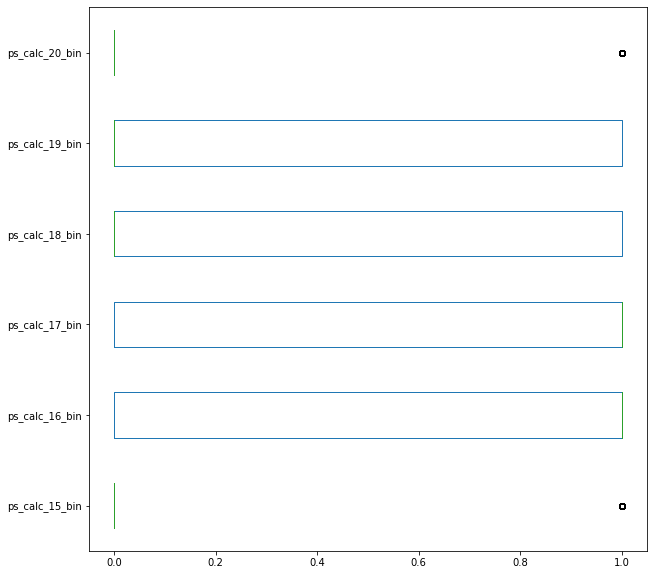

In [ ]:
lista_id_target = ['id', 'target']
df_ps_cal_bin.drop(lista_id_target, axis=1).plot.box(vert=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


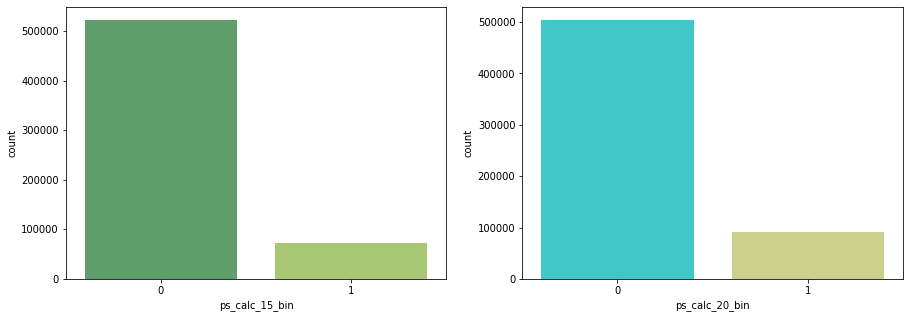

In [ ]:
# Analise gráfica das colunas "ps_calc_15_bin" e "ps_calc_20_bin", que são parecidas com a coluna TARGET

fig,ax = plt.subplots(1,2,figsize=(15,5),sharex='all')
ax1,ax2 = ax.flatten()
sns.countplot(df_ps_cal_bin['ps_calc_15_bin'],palette='summer',ax=ax1)
sns.countplot(df_ps_cal_bin['ps_calc_20_bin'],palette='rainbow',ax=ax2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

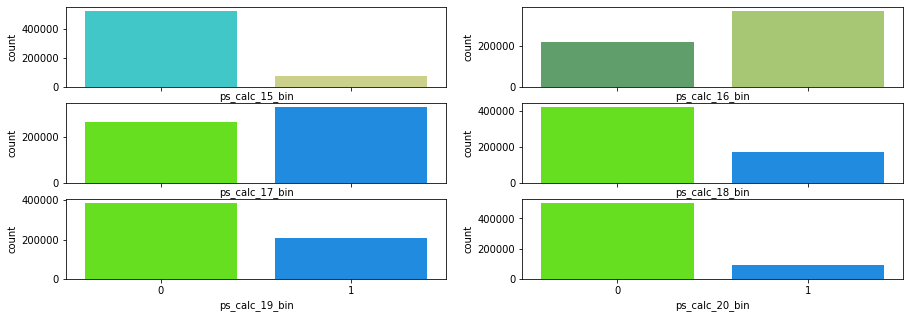

In [ ]:
# Grupo 8: Index(['id', 'target', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin')

fig,ax = plt.subplots(3,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(df_ps_cal_bin['ps_calc_15_bin'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_cal_bin['ps_calc_16_bin'],palette='summer',ax=ax2)
sns.countplot(df_ps_cal_bin['ps_calc_17_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_cal_bin['ps_calc_18_bin'],palette='gist_rainbow',ax=ax4)
sns.countplot(df_ps_cal_bin['ps_calc_19_bin'],palette='gist_rainbow',ax=ax5)
sns.countplot(df_ps_cal_bin['ps_calc_20_bin'],palette='gist_rainbow',ax=ax6)

##ANALISE DO RESULTADO - GRUPO 8:
***
Colunas possuem os mesmos valores da TARGET, porém as colunas "ps_calc_15_bin" e "ps_calc_20_bin" mais se assemelham.
Nas colunas "ps_calc_16_bin" e "ps_calc_17_bin" pode-se ver um percentual inverso ao TARGET, com os valores "1" com maior destaque.
Não existem valores ausentes e nem outliers para esse grupo.
***

# GERAÇÃO DE MODELO PARA CÁLCULO DE ACURÁCIA SEM TRATAMENTO DE DADOS

***
-  Separação dos dados em TREINO e VALIDAÇÃO
- Acurácia do modelo Regressão Linear
- Acurácia do modelo Randon Forest
***


## SEM BALANCEAMENTO DA COLUNA TARGER

***
Utilização do DataFrame original - df_train
***

###SEPARAÇÃO DO DATA FRAME EM TREINO E VALIDAÇÃO


RETIRADA DA COLUNA DE "TARGET" DA BASE ORIGINAL DO DADOS

In [19]:
y_train = df_train['target'].values
id_train = df_train['id'].values

x_train = df_train.drop(['target', 'id'], axis=1)

DIVISÃO DOS DADOS EM TREINO E TESTE
- PARA O TESTE SERÁ CONSIDERADO 20% DA BASE

In [20]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

print('Registro gerados para Treino: {}'.format(len(x_train)))
print('Registro gerados para Teste: {}'.format(len(x_valid)))

Registro gerados para Treino: 476169
Registro gerados para Teste: 119043


###PREDIÇÃO USANDO O MODELO RANDON FOREST E REGRESSÃO LOGÍSTICA

 #### INCLUSÃO DA BIBLIOTECA QUE SERÁ USADA PARA OS MODELOS E ACURÁCIAS

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#### GERAÇÃO DO MODELO RANDON FOREST

TREINO NO MODELO RANDON FOREST

In [22]:
modelRF = RandomForestClassifier(class_weight="balanced", min_samples_split=10, n_jobs=-1)

modelRF.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1)

In [23]:
y_RF = modelRF.predict(x_valid)

MATRIZ DE CONFUSÃO PARA DA VALIDAÇÃO DO MODELO - RANDON FOREST -

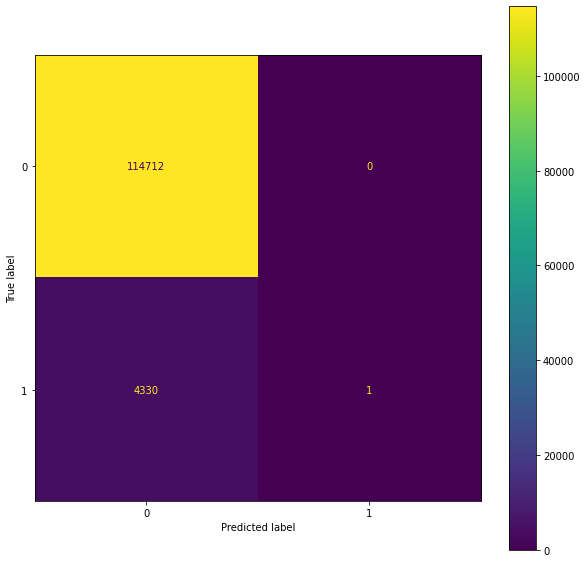

In [24]:
cm = confusion_matrix(y_valid, y_RF)
ConfusionMatrixDisplay(cm).plot();

ACURÁCIA DO MODELO RANDON FOREST

In [25]:
# Calculo de acurácia do Randon Forest sem Tratamento
acur_RFST = metrics.accuracy_score(y_valid, y_RF)
print('Acurácia: ', acur_RFST)


Acurácia:  0.963626588711642


CROSS VALIDATED PARA RANDON FOREST SEM TRATAMENTO E SEM BALANCEAMENTO

In [26]:
# CV_RFST = Cross Validated Randon Forest sem Tratamento
from sklearn.model_selection import cross_val_score

scoreCV_RFsT = cross_val_score(modelRF, x_train, y_train, cv=5)
print(scoreCV_RFsT)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_RFST)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_RFsT.std()))
print("Acurácia CV_RF:                                            %0.2f" % (scoreCV_RFsT.mean()))
print("*****************************************************************************************************************")

[0.96355293 0.96353193 0.96354243 0.96355293 0.96354205]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Randon Forest normal:                             0.96
Desvio Padrão Randon Forest - Cross Validated:             0.00
Acurácia CV_RF:                                            0.96
*****************************************************************************************************************


#### GERAÇÃO DO MODELO REGRESSÃO LOGÍSTICA

TREINO PARA REGRESSÃO LOGÍSTICA

In [28]:
modelRL = LogisticRegression(max_iter=5000)

modelRL.fit(x_train,y_train)


LogisticRegression(max_iter=5000)

PREDIÇÃO PARA REGRESSÃO LOGÍSTICA

In [29]:
y_RLST = modelRL.predict(x_valid)

MATRIZ DE CONFUSÃO PARA AVALIAÇÃO DO MODELO

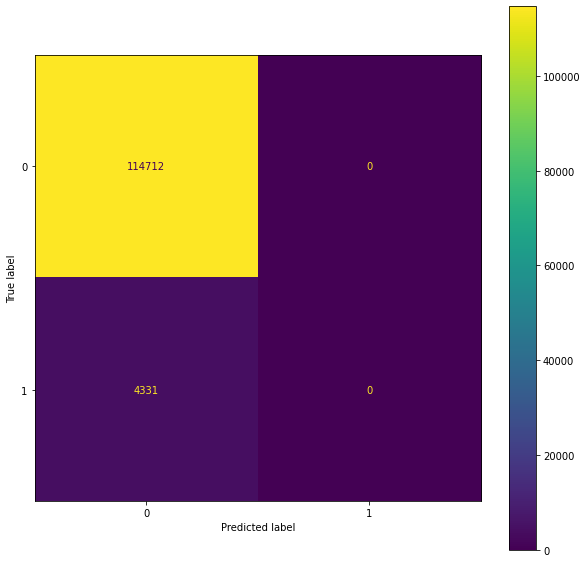

In [30]:
cm = confusion_matrix(y_valid, y_RLST)
ConfusionMatrixDisplay(cm).plot();

ACURÁCIA DO MODELO REGRESSÃO LINEAR

In [31]:
acur_RLST = metrics.accuracy_score(y_valid, y_RLST)
print('Acurácia: ',acur_RLST)
print('Acurácia: ',metrics.accuracy_score(y_valid, y_RLST, normalize=False))

Acurácia:  0.9636181883857093
Acurácia:  114712


CROSS VALIDATED PARA REGRESSAO LOGISTICA SEM TRATAMENTO E SEM BALANCEAMENTO

In [34]:
# CV_RFST = Cross Validated Regressão Logística sem Tratamento

scoreCV_RLsT = cross_val_score(modelRL, x_train, y_train, cv=5)
print(scoreCV_RLsT)

print ("  ")
print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Regressao Logistica normal                        %0.2f" % acur_RLST)
print("Desvio Padrão Regressao Logistica - Cross Validated:       %0.2f" % (scoreCV_RLsT.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_RLsT.mean()))
print("*****************************************************************************************************************")

[0.96354243 0.96353193 0.96353193 0.96353193 0.96354205]
  
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Regressao Logistica normal                        0.96
Desvio Padrão Regressao Logistica - Cross Validated:       0.00
Acurácia CV_RL:                                            0.96
*****************************************************************************************************************


# ANÁLISE DAS COLUNAS DE MISSING

***
- Demonstrar os Missing retirando o atribuido "-1"
- Análise das colunas
***

## PARAMETROS

In [35]:
import missingno as msno 

In [36]:
%matplotlib inline 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi':75,
    'figure.autolayout':False,
    'figure.figsize':[12,8],
    'axes.labelsize': 18,
    'axes.titlesize':18,
    'font.size': 18,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16}
sns.set(style='dark',rc=rc)


default_color = '#56B4E9'
colormap = plt.cm.cool

## TRATAMENTO DE MISSINGS

Os dados missings foram tratados com "-1", logo existem dados faltantes, o que será demonstrado nos gráficos abaixo.

In [37]:
 # substituição do -1 por NaN para que possa utilizar as ferramentas da biblioteca "Missingno" no tratamento dos dados faltantes. 

from numpy.core.numeric import NaN 
df_NaN = df_train.replace(-1,NaN)

# contagem do numero de dados faltantes e exibição das observações que possuem dados faltantes.
df_NaN.isnull().sum() 

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [38]:
# DataFrame com as colunas que possuem dados faltantes.

missingValueColumns = df_NaN.columns[df_NaN.isnull().any()].tolist()
df_Ausentes = df_NaN[missingValueColumns]

# colunas e quantidades de valores ausente

df_Ausentes.isnull().sum()

ps_ind_02_cat       216
ps_ind_04_cat        83
ps_ind_05_cat      5809
ps_reg_03        107772
ps_car_01_cat       107
ps_car_02_cat         5
ps_car_03_cat    411231
ps_car_05_cat    266551
ps_car_07_cat     11489
ps_car_09_cat       569
ps_car_11             5
ps_car_12             1
ps_car_14         42620
dtype: int64

Gráfico das colunas de missing com quantidade de registros preenchidos 

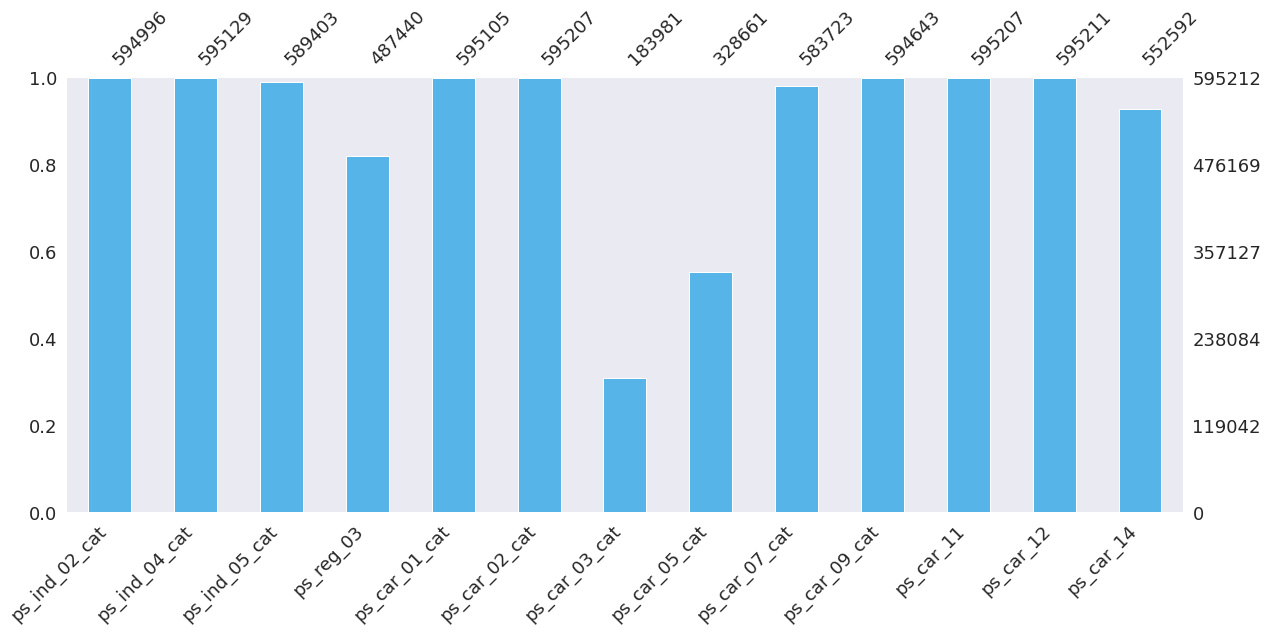

In [39]:

msno.bar(df_Ausentes, figsize=(20,8), color=default_color, fontsize=18, labels=True)

Gráfico Percentual das colunas de missing

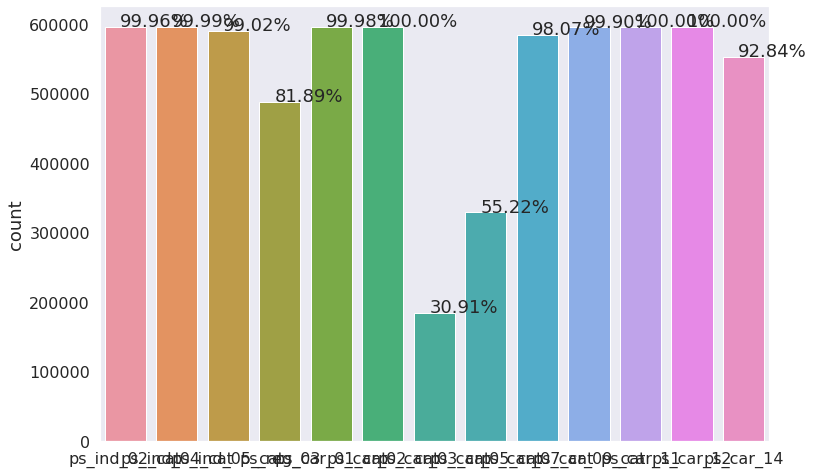

In [40]:
ax = sns.countplot(data=df_Ausentes)

for p in ax.patches:
  ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_Ausentes)), (p.get_x()+ 0.3, p.get_height()+1000))

Associação entre as variaveis missing

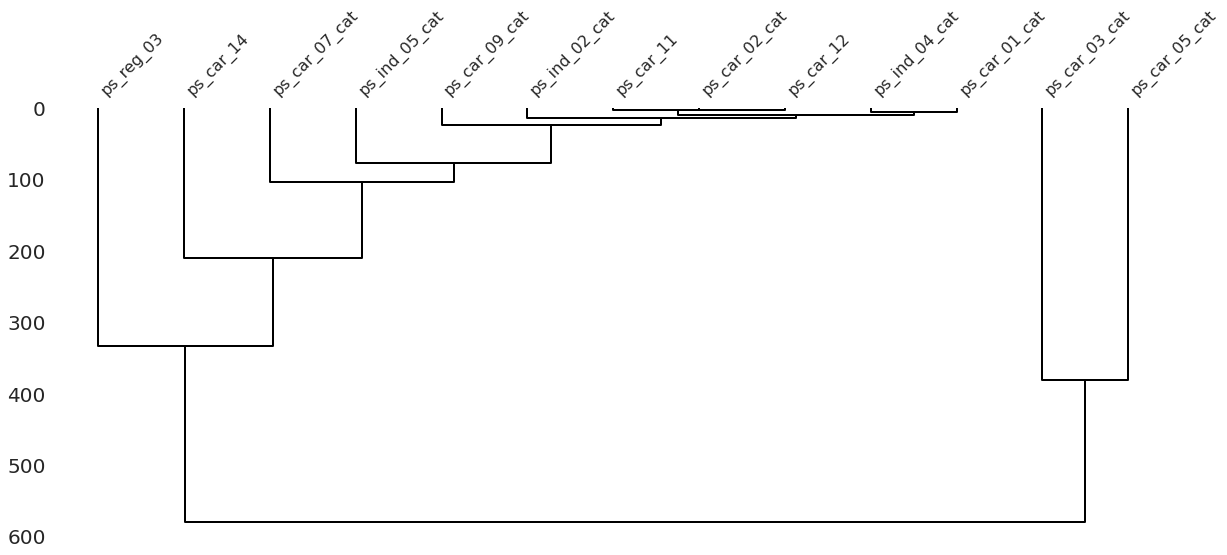

In [41]:

msno.dendrogram(df_Ausentes, figsize=(20,8))

# GERAÇÃO DE MODELO PARA CÁLCULO DE ACURÁCIA COM TRATAMENTO DE DADOS






## RETIRADA DAS COLUNAS PS_CAR_03_CAT e PS_CAR_05_CAT

### GERAÇÃO DO DATAFRAME E DIVISÃO EM TREINO E TESTE

In [42]:
# COPIA DO DATAFRAME ORIGINAL

df_missing = df_train.copy()
df_missing = df_missing.drop(columns=['ps_car_03_cat', 'ps_car_05_cat'])
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 297606
Data columns (total 57 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [43]:
# RETIRADO DO DATA FRAME DA COLUNA DE TARGET

y_train = df_missing['target'].values
id_train = df_missing['id'].values

x_train = df_missing.drop(['target', 'id'], axis=1)

In [44]:
# SEPARAÇÃO DO DATA FRAME EM TREINO E VALIDAÇÃO, CONSIDERANDO 20% PARA TESTE

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

print('Registro gerados para Treino: {}'.format(len(x_train)))
print('Registro gerados para Teste: {}'.format(len(x_valid)))

Registro gerados para Treino: 476169
Registro gerados para Teste: 119043


### RANDON FOREST

In [45]:
# GERAÇÃO DO MODELO UTILIZANDO RANDON FOREST

Model_MRF = RandomForestClassifier(class_weight="balanced", min_samples_split=10, n_jobs=-1)

Model_MRF.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1)

In [46]:
# PREDIÇÃO USANDO O MODELO APRESENTADO NO COMANDO ANTERIOR

y_MRF = Model_MRF.predict(x_valid)

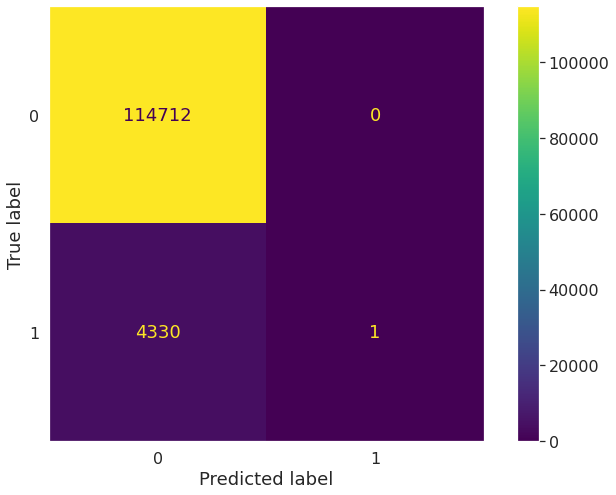

In [47]:
# MATRIZ DE CONFUSÃO PARA ANALISE DOS DADOS GERADOS PELO MODELO

cm = confusion_matrix(y_valid, y_MRF)
ConfusionMatrixDisplay(cm).plot();

In [48]:
# ACURÁCIA DA PREDIÇÃO 

acur_M35RF = metrics.accuracy_score(y_valid, y_MRF)

print('Acurácia: ',acur_M35RF)

Acurácia:  0.963626588711642


In [49]:
# CV_M35RF = Cross Validated Randon Forest - Retirando 2 colunas missing

scoreCV_M35RF = cross_val_score(Model_MRF, x_train, y_train, cv=5)
print(scoreCV_M35RF)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_M35RF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_M35RF.std()))
print("Acurácia CV_RF:                                            %0.2f" % (scoreCV_M35RF.mean()))
print("*****************************************************************************************************************")

[0.96355293 0.96352143 0.96354243 0.96353193 0.96355255]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Randon Forest normal:                             0.96
Desvio Padrão Randon Forest - Cross Validated:             0.00
Acurácia CV_RF:                                            0.96
*****************************************************************************************************************


### REGRESSÃO LOGISTICA

In [50]:
# MODELO DE REGRESSÃO LOGÍSTICA

logistic_regression= LogisticRegression(max_iter=5000)

logistic_regression.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [51]:
# PREDIÇÃO DO MODELO REGRESSÃO LOGÍSTICA

y_MMRL = logistic_regression.predict(x_valid)

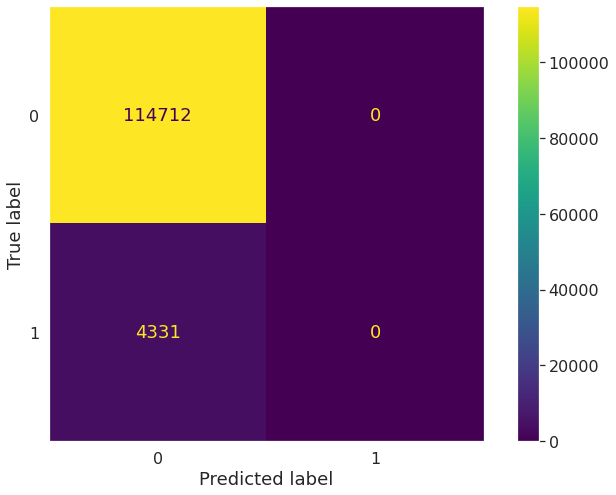

In [52]:
# DEMONSTRAÇÃO DA MATRIZ DE CONFUSÃO

cm = confusion_matrix(y_valid, y_MMRL)
ConfusionMatrixDisplay(cm).plot();

In [53]:
# ACURÁCIA DO MODELO REGRESSÃO LOGÍSTICA

acur_M35RL = metrics.accuracy_score(y_valid, y_MMRL)

print('Acurácia: ',acur_M35RL)
print('Acurácia: ',metrics.accuracy_score(y_valid, y_MMRL, normalize=False))

Acurácia:  0.9636181883857093
Acurácia:  114712


In [55]:
# CV_M35RF = Cross Validated REGRESSÃO LOGÍSTICA - Retirando 2 colunas missing

scoreCV_M35RL = cross_val_score(Model_MRF, x_train, y_train, cv=5)
print(scoreCV_M35RL)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_M35RL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_M35RL.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_M35RL.mean()))
print("*****************************************************************************************************************")

[0.96354243 0.96353193 0.96354243 0.96355293 0.96354205]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Regressão Logística normal:                       0.96
Desvio Padrão Regressão Logística - Cross Validated:       0.00
Acurácia CV_RL:                                            0.96
*****************************************************************************************************************


## RETIRADA DE TODAS AS LINHAS MISSING

### IDENTIFICAÇÃO DOS MISSING E RETIRADA

In [56]:
# substituição do -1 por NaN para que possa utilizar as ferramentas da biblioteca "Missingno" no tratamento dos dados faltantes. 

from numpy.core.numeric import NaN 
df_missing = df_missing.replace(-1,NaN)

# contagem do numero de dados faltantes e exibição das observações que possuem dados faltantes.
df_missing.isnull().sum() 

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_04_cat          0
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0
ps_calc_03             0


In [57]:
# RETIRADA DOS REGISTROS NULOS

df_missing = df_missing.dropna(axis=0)

df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443531 entries, 0 to 297605
Data columns (total 57 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              443531 non-null  int64  
 1   target          443531 non-null  int64  
 2   ps_ind_01       443531 non-null  int64  
 3   ps_ind_02_cat   443531 non-null  float64
 4   ps_ind_03       443531 non-null  int64  
 5   ps_ind_04_cat   443531 non-null  float64
 6   ps_ind_05_cat   443531 non-null  float64
 7   ps_ind_06_bin   443531 non-null  int64  
 8   ps_ind_07_bin   443531 non-null  int64  
 9   ps_ind_08_bin   443531 non-null  int64  
 10  ps_ind_09_bin   443531 non-null  int64  
 11  ps_ind_10_bin   443531 non-null  int64  
 12  ps_ind_11_bin   443531 non-null  int64  
 13  ps_ind_12_bin   443531 non-null  int64  
 14  ps_ind_13_bin   443531 non-null  int64  
 15  ps_ind_14       443531 non-null  int64  
 16  ps_ind_15       443531 non-null  int64  
 17  ps_ind_16_

In [58]:
# DEMONSTRAÇÃO QUE NÃO EXISTE COLUNAS COM NULO

df_missing.isnull().sum() 

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [59]:
# QUANTIDADE DE REGISTROS POR ALVO APÓS RETIRADA DE MISSING

df_missing.target.value_counts()

0    427106
1     16425
Name: target, dtype: int64

In [60]:
# QUANTIDADE DE REGISTRO EM PERCENTUAL

qtd_target = df_missing['target'].value_counts()


print('Quantidade de registros ' , df_missing['target'].min() , ':' ,qtd_target[0], 'corresponde a:', qtd_target[0]/qtd_target.sum() * 100)
print('Quantidade de registros ' , df_missing['target'].max() , ':' ,qtd_target[1], 'corresponde a:', qtd_target[1]/qtd_target.sum() * 100)

Quantidade de registros  0 : 427106 corresponde a: 96.29676392405491
Quantidade de registros  1 : 16425 corresponde a: 3.703236075945086


### SEPARAÇÃO DOS DADOS

In [61]:

y_train = df_missing['target'].values
id_train = df_missing['id'].values

x_train = df_missing.drop(['target', 'id'], axis=1)

# FAZ SEPARAÇÃO DOS DADOS EM TREINO E VALIDAÇÃO

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

print('Registro gerados para Treino: {}'.format(len(x_train)))
print('Registro gerados para Teste: {}'.format(len(x_valid)))

Registro gerados para Treino: 354824
Registro gerados para Teste: 88707


### MODELO RANDON FOREST SEM MISSING

In [62]:
# RANDON FOREST PARA DATAFRAME SEM REGISTROS MISSING

Modelmmrf = RandomForestClassifier(class_weight="balanced", min_samples_split=10, n_jobs=-1)

Modelmmrf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1)

In [64]:
y_MMRF = Modelmmrf.predict(x_valid)

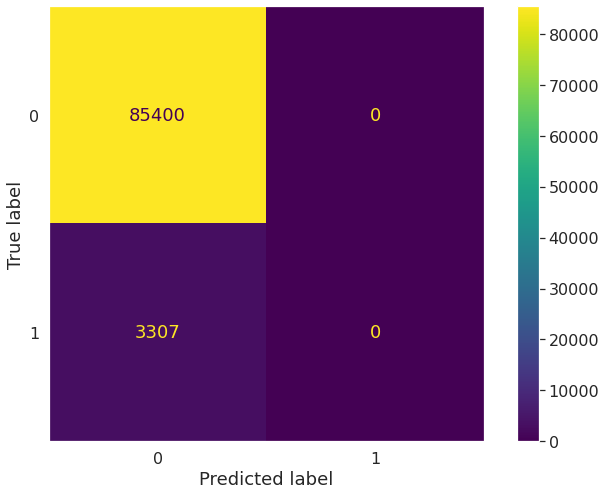

In [65]:
# MATRIZ DE CONFUSÃO PARA RANDON FOREST SEM REGISTRO MISSING

cm = confusion_matrix(y_valid, y_MMRF)
ConfusionMatrixDisplay(cm).plot();

In [66]:
acur_MALLRF = metrics.accuracy_score(y_valid, y_MMRF)

print('Acurácia: ',acur_MALLRF)

Acurácia:  0.9627199657298747


In [67]:
# CV_MALLRF = Cross Validated RANDON FOREST - Retirando todos registros missing

scoreCV_MALLRF = cross_val_score(Modelmmrf, x_train, y_train, cv=5)
print(scoreCV_MALLRF)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_MALLRF)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_MALLRF.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_MALLRF.mean()))
print("*****************************************************************************************************************")

[0.96303812 0.96302403 0.96302403 0.96302403 0.9630376 ]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Regressão Logística normal:                       0.96
Desvio Padrão Regressão Logística - Cross Validated:       0.00
Acurácia CV_RL:                                            0.96
*****************************************************************************************************************


### REGRESSÃO LOGÍSTICA SEM MISSING

In [68]:
modelRLSM = LogisticRegression(max_iter=5000)

modelRLSM.fit(x_train,y_train)


LogisticRegression(max_iter=5000)

In [69]:
y_RLSM = modelRLSM.predict(x_valid)

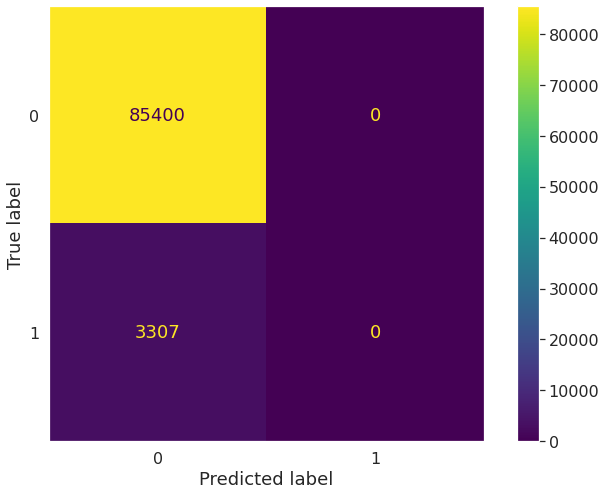

In [70]:
cm = confusion_matrix(y_valid, y_RLSM)
ConfusionMatrixDisplay(cm).plot();

In [71]:
acur_MALLRL = metrics.accuracy_score(y_valid, y_RLSM)

print('Acurácia: ', acur_MALLRL)
print('Acurácia: ',metrics.accuracy_score(y_valid, y_RLSM, normalize=False))

Acurácia:  0.9627199657298747
Acurácia:  85400


In [72]:
# CV_MALLRL = Cross Validated REGRESSÃO LOGÍSTICA - Retirando todos registros missing

scoreCV_MALLRL = cross_val_score(modelRLSM, x_train, y_train, cv=5)
print(scoreCV_MALLRL)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_MALLRL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_MALLRL.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_MALLRL.mean()))
print("*****************************************************************************************************************")

[0.96303812 0.96302403 0.96302403 0.96302403 0.9630376 ]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Regressão Logística normal:                       0.96
Desvio Padrão Regressão Logística - Cross Validated:       0.00
Acurácia CV_RL:                                            0.96
*****************************************************************************************************************


## BALANCEAMENTO DA BASE

### SEM TRATAMENTO DAS COLUNAS

#### SEPARAÇÃO DA BASE EM TAMANHO IGUAL PELO COLUNA TARGET

In [79]:
# CRIAÇÃO DE DATAFRAME COM QUANTIDADE IGUAIS DE REGISTROS DO TARGET 

dftarget_1 = df_train.loc[df_train['target']==1]
dftarget_0 = df_train.loc[df_train['target']==0]

# SELECIONA ALEATORIAMENTE A MESMA QUANTIDADE DE REGISTRO DO TARGET 1
dftarget_0ale = dftarget_0.sample(21694)

dftarget = pd.merge(dftarget_1, dftarget_0ale, how = 'outer')


print("Somente registros TARGET = 1:" ,    dftarget_1['target'].value_counts())
print("Somente registros TARGET = 0:",     dftarget_0['target'].value_counts())
print("Novo Dataframe Balanceado:" ,       dftarget['target'].value_counts())


Somente registros TARGET = 1: 1    21694
Name: target, dtype: int64
Somente registros TARGET = 0: 0    573518
Name: target, dtype: int64
Novo Dataframe Balanceado: 1    21694
0    21694
Name: target, dtype: int64


#### SEPARAÇÃO DO DATAFRAME EM TESTE E VALIDAÇÃO

In [80]:
y2_train = dftarget['target'].values
id2_train = dftarget['id'].values

x_train2 = dftarget.drop(['target', 'id'], axis=1)

In [81]:
x_train2, x_valid2, y2_train, y2_valid = train_test_split(x_train2, y2_train, test_size=0.2, random_state=4242)

print('Registro gerados para Treino: {}'.format(len(x_train2)))
print('Registro gerados para Teste: {}'.format(len(x_valid2)))

Registro gerados para Treino: 34710
Registro gerados para Teste: 8678


#### RANDON FOREST 

In [82]:
# BSTRF = BALANCEADA SEM TRATAMENTO RANDON FOREST

model_BSTRF = RandomForestClassifier(class_weight="balanced", min_samples_split=10, n_jobs=-1)

model_BSTRF.fit(x_train2, y2_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1)

In [83]:
y_BSTRF = model_BSTRF.predict(x_valid2)

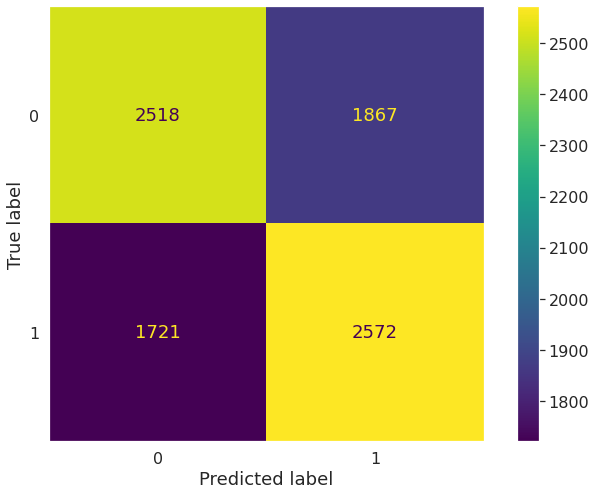

In [84]:
cm = confusion_matrix(y2_valid, y_BSTRF)
ConfusionMatrixDisplay(cm).plot();

In [86]:
acur_BSTRF = metrics.accuracy_score(y2_valid, y_BSTRF)

print('Acurácia: ', acur_BSTRF)

Acurácia:  0.5865406775754782


In [96]:
# CV_BSTRF = Cross Validated RANDON FOREST - Balanceado

scoreCV_BSTRF = cross_val_score(model_BSTRF, x_train2, y2_train, cv=5)
print(scoreCV_BSTRF)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_BSTRF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_BSTRF.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_BSTRF.mean()))
print("*****************************************************************************************************************")

[0.57951599 0.59363296 0.59435321 0.58614232 0.57821953]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Randon Forest normal:                             0.59
Desvio Padrão Randon Forest - Cross Validated:             0.01
Acurácia CV_RL:                                            0.59
*****************************************************************************************************************


#### REGRESSÃO LOGÍSTICA

In [90]:
model_BSTRL = LogisticRegression(max_iter=5000)

model_BSTRL.fit(x_train2,y2_train)

LogisticRegression(max_iter=5000)

In [91]:
y_BSTRL = model_BSTRL.predict(x_valid2)

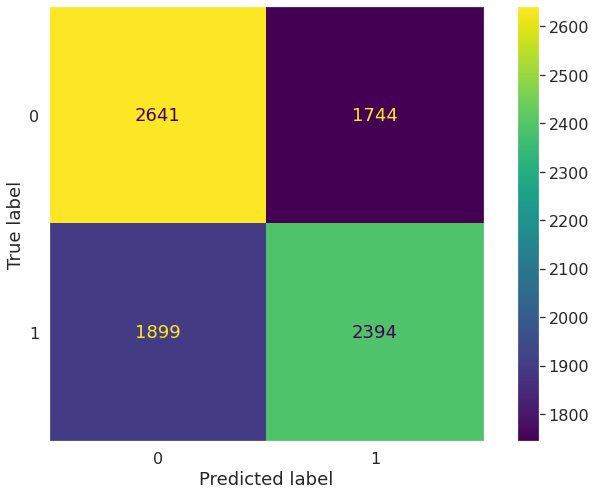

In [92]:
cm = confusion_matrix(y2_valid, y_BSTRL)
ConfusionMatrixDisplay(cm).plot();

In [94]:
acur_BSTRL = metrics.accuracy_score(y2_valid, y_BSTRL)

print('Acurácia: ',acur_BSTRL)

Acurácia:  0.5802028117077668


In [95]:
# CV_BSTRL = Cross Validated REGRESSÃO LOGÍSTICA - Balanceado

scoreCV_BSTRL = cross_val_score(model_BSTRF, x_train2, y2_train, cv=5)
print(scoreCV_BSTRL)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_BSTRL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_BSTRL.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_BSTRL.mean()))
print("*****************************************************************************************************************")

[0.58455776 0.59997119 0.59305676 0.58700663 0.58470182]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Regressão Logística normal:                       0.58
Desvio Padrão Regressão Logística - Cross Validated:       0.01
Acurácia CV_RL:                                            0.59
*****************************************************************************************************************


### COM RETIRADA DE MISSING

#### SEPARAÇÃO DA BASE EM TAMANHO IGUAL

In [101]:
# CRIAÇÃO DE DATAFRAME COM QUANTIDADE IGUAIS DE REGISTROS DO TARGET 

dftarget_1 = df_missing.loc[df_missing['target']==1]
dftarget_0 = df_missing.loc[df_missing['target']==0]

# SELECIONA ALEATORIAMENTE A MESMA QUANTIDADE DE REGISTRO DO TARGET 1
dftarget_0 = dftarget_0.sample(16425)

dftargetMis = pd.merge(dftarget_1, dftarget_0, how = 'outer')


print("Somente registros TARGET = 1:" ,    dftarget_1['target'].value_counts())
print("Somente registros TARGET = 0:",     dftarget_0['target'].value_counts())
print("Novo Dataframe Balanceado:" ,       dftargetMis['target'].value_counts())

Somente registros TARGET = 1: 1    16425
Name: target, dtype: int64
Somente registros TARGET = 0: 0    16425
Name: target, dtype: int64
Novo Dataframe Balanceado: 1    16425
0    16425
Name: target, dtype: int64


#### SEPARAÇÃO DO DATAFRAME EM TESTE E VALIDAÇÃO

In [102]:
y2_train = dftargetMis['target'].values
id2_train = dftargetMis['id'].values

x_train2 = dftargetMis.drop(['target', 'id'], axis=1)

In [103]:
x_train2, x_valid2, y2_train, y2_valid = train_test_split(x_train2, y2_train, test_size=0.2, random_state=4242)

print('Registro gerados para Treino: {}'.format(len(x_train2)))
print('Registro gerados para Teste: {}'.format(len(x_valid2)))

Registro gerados para Treino: 26280
Registro gerados para Teste: 6570


#### RANDON FOREST

In [104]:
# BSMRF = BALANCEADA SEM MISSING RANDON FOREST

model_BSMRF = RandomForestClassifier(class_weight="balanced", min_samples_split=10, n_jobs=-1)

model_BSMRF.fit(x_train2, y2_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1)

In [106]:
y_BSMRF = model_BSMRF.predict(x_valid2)

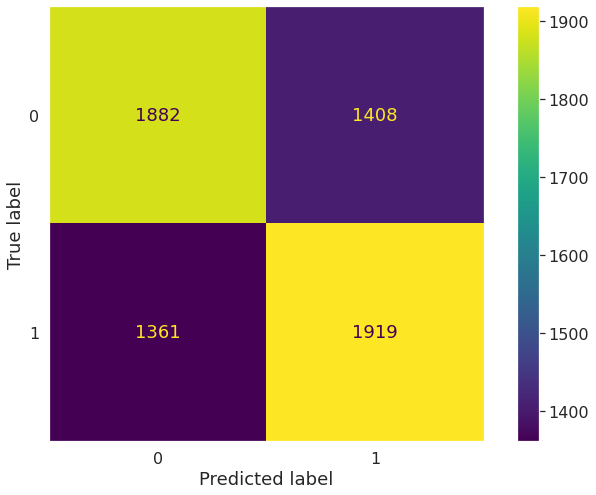

In [107]:
cm = confusion_matrix(y2_valid, y_BSMRF)
ConfusionMatrixDisplay(cm).plot();

In [108]:
acur_BSMRF = metrics.accuracy_score(y2_valid, y_BSMRF)

print('Acurácia: ', acur_BSMRF)

Acurácia:  0.5785388127853881


In [111]:
# CV_BSMRF = Cross Validated RANDON FOREST - Balanceado Sem Missing

scoreCV_BSMRF = cross_val_score(model_BSMRF, x_train2, y2_train, cv=5)
print(scoreCV_BSMRF)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_BSMRF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_BSMRF.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_BSMRF.mean()))
print("*****************************************************************************************************************")

[0.58238204 0.58295282 0.56678082 0.57191781 0.57515221]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Randon Forest normal:                             0.58
Desvio Padrão Randon Forest - Cross Validated:             0.01
Acurácia CV_RL:                                            0.58
*****************************************************************************************************************


#### REGRESSÃO LOGÍSTICA

In [112]:
model_BSMRL = LogisticRegression(max_iter=5000)

model_BSMRL.fit(x_train2,y2_train)

LogisticRegression(max_iter=5000)

In [113]:
y_BSMRL = model_BSMRL.predict(x_valid2)

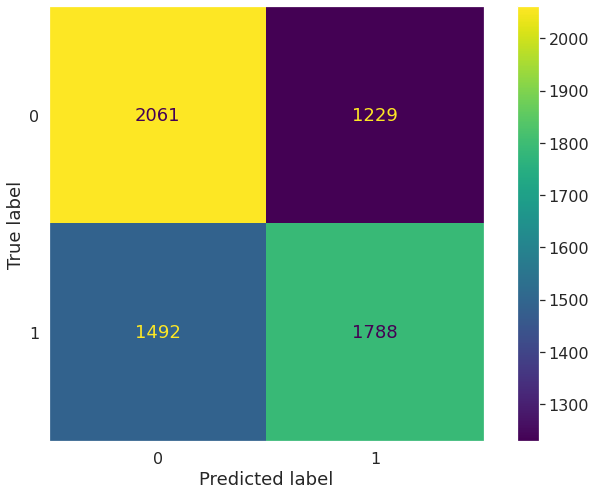

In [114]:
cm = confusion_matrix(y2_valid, y_BSMRL)
ConfusionMatrixDisplay(cm).plot();

In [115]:
acur_BSMRL = metrics.accuracy_score(y2_valid, y_BSMRL)

print('Acurácia: ',acur_BSMRL)

Acurácia:  0.5858447488584475


In [117]:
# CV_BSMRL = Cross Validated REGRESSÃO LOGÍSTICA - Balanceado

scoreCV_BSMRL = cross_val_score(model_BSMRL, x_train2, y2_train, cv=5)
print(scoreCV_BSMRL)

print("******************************************* RESULTADO COMPARATIVO ***********************************************")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_BSMRL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_BSMRL.std()))
print("Acurácia CV_RL:                                            %0.2f" % (scoreCV_BSMRL.mean()))
print("*****************************************************************************************************************")

[0.58561644 0.59398782 0.58200152 0.58447489 0.57001522]
******************************************* RESULTADO COMPARATIVO ***********************************************
Acurácia Regressão Logística normal:                       0.59
Desvio Padrão Regressão Logística - Cross Validated:       0.01
Acurácia CV_RL:                                            0.58
*****************************************************************************************************************


#RESULTADO FINAL DE TODOS OS TRATAMENTOS E MODELOS APLICADOS

In [118]:
print("******************************************* RESULTADO FINAL *****************************************************")
print("  ")
print("RANDON FOREST SEM TRATAMENTO E BALANCEAMENTO")
print("--------------------------------------------")
print("  ")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_RFST)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_RFsT.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_RFsT.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("REGRESSÃO LOGÍSTICA SEM TRATAMENTO E BALANCEAMENTO")
print("--------------------------------------------------")
print("  ")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_RLST)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_RLsT.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_RLsT.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("RANDON FOREST - RETIRADA 2 COLUNAS MISSING")
print("------------------------------------------")
print("  ")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_M35RF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_M35RF.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_M35RF.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("REGRESSÃO LOGÍSTICA - RETIRADA 2 COLUNAS MISSING")
print("------------------------------------------------")
print("  ")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_M35RL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_M35RL.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_M35RL.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("RANDON FOREST - RETIRADA TODAS COLUNAS MISSING")
print("----------------------------------------------")
print("  ")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_MALLRF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_MALLRF.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_MALLRF.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("REGRESSÃO LOGÍSTICA - RETIRADA TODAS COLUNAS MISSING")
print("----------------------------------------------------")
print("  ")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_MALLRL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_MALLRL.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_MALLRL.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("RANDON FOREST - BALANCEADO SEM TRATAMENTO")
print("-----------------------------------------")
print("  ")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_BSTRF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_BSTRF.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_BSTRF.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("REGRESSÃO LOGÍSTICA - BALANCEADO SEM TRATAMENTO")
print("-----------------------------------------------")
print("  ")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_BSTRL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_BSTRL.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_BSTRL.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("RANDON FOREST - BALANCEADO SEM MISSING")
print("--------------------------------------")
print("  ")
print("Acurácia Randon Forest normal:                             %0.2f" % acur_BSMRF)
print("Desvio Padrão Randon Forest - Cross Validated:             %0.2f" % (scoreCV_BSMRF.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_BSMRF.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")
print("  ")
print("REGRESSÃO LOGÍSTICA - BALANCEADO SEM MISSING")
print("--------------------------------------------")
print("  ")
print("Acurácia Regressão Logística normal:                       %0.2f" % acur_BSMRL)
print("Desvio Padrão Regressão Logística - Cross Validated:       %0.2f" % (scoreCV_BSMRL.std()))
print("Acurácia CV:                                               %0.2f" % (scoreCV_BSMRL.mean()))
print("  ")
print("_________________________________________________________________________________________________________________")


******************************************* RESULTADO FINAL *****************************************************
  
RANDON FOREST SEM TRATAMENTO E BALANCEAMENTO
--------------------------------------------
  
Acurácia Randon Forest normal:                             0.96
Desvio Padrão Randon Forest - Cross Validated:             0.00
Acurácia CV:                                               0.96
  
_________________________________________________________________________________________________________________
  
REGRESSÃO LOGÍSTICA SEM TRATAMENTO E BALANCEAMENTO
--------------------------------------------------
  
Acurácia Regressão Logística normal:                       0.96
Desvio Padrão Regressão Logística - Cross Validated:       0.00
Acurácia CV:                                               0.96
  
_________________________________________________________________________________________________________________
  
RANDON FOREST - RETIRADA 2 COLUNAS MISSING
------------------